In [ ]:
%ls

In [2]:
from pyvirtualdisplay import Display
from pyvirtualdisplay import Display
import torch
import open3d as o3d

from arguments import get_config, load_config
from interfaces import setup_LMP, LMP_interface
from visualizers import ValueMapVisualizer
from utils import set_lmp_objects
import numpy as np
import engine_interfaces
from envs.pyrep_quad_env import VoxPoserPyRepQuadcopterEnv
from engine_interfaces import Dummy
from VLMPipline.VLM import VLM

torch.set_grad_enabled(False)
disp = Display(visible=False, size=(1920, 1080))
disp.start()
# vlm config
owlv2_model_path = "/models/google-owlv2-large-patch14-finetuned"
owlv2_model_path = "/models/google-owlv2-base-patch16-ensemble"
sam_model_path = "/models/facebook-sam-vit-huge"
# sam_model_path = "/models/facebook-sam-vit-base"
xmem_model_path = "/models/XMem.pth"
resnet_18_path = "/models/resnet18.pth"
resnet_50_path = "/models/resnet50.pth"
config_path = "configs/pyrep_quadcopter.yaml"
scene_path = "./scene/quadcopter.ttt"
config = get_config(config_path=config_path)
vlmpipeline = VLM(
    owlv2_model_path,
    sam_model_path,
    xmem_model_path,
    resnet_18_path,
    resnet_50_path,
    verbose=True,
    resize_to=[640,640],
    verbose_frame_every=1,
)


Hyperparameters read from the model weights: C^k=64, C^v=512, C^h=64
Single object mode: False


QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'


Camera parameters: {'cam_NE': {'extrinsic_params': array([[ 7.07106709e-01,  0.00000000e+00, -7.07106888e-01,
         4.80000019e+00],
       [-7.07106888e-01, -1.19209290e-07, -7.07106829e-01,
         4.80000019e+00],
       [ 0.00000000e+00,  1.00000012e+00, -1.19209290e-07,
         1.50000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'intrinsic_params': array([[-659.3946015,    0.       ,  240.       ],
       [   0.       , -659.3946015,  240.       ],
       [   0.       ,    0.       ,    1.       ]]), 'far_near': (20.0, 0.009999999776482582)}, 'cam_NW': {'extrinsic_params': array([[ 7.07106709e-01,  0.00000000e+00,  7.07106888e-01,
        -4.80000019e+00],
       [ 7.07106888e-01, -1.19209290e-07, -7.07106829e-01,
         4.80000019e+00],
       [ 0.00000000e+00,  1.00000012e+00, -1.19209290e-07,
         1.50000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'intrinsic_param

/mnt/workspace/src/VLMPipline/VLM.py:84: UserWarning: the frame shape has been changed by resizing, (3, 480, 480) -> (3, 640, 640), so we will resize the finnal mask to the original shape, which may cause some problems.
  warnings.warn(f"the frame shape has been changed by resizing, {self.original_frame_shape} -> {frame.shape}, so we will resize the finnal mask to the original shape, which may cause some problems.")


Detect object: ['table']
Detected 1 objects, boxes, scores, labels are: [([-0.8792304992675781, 419.037109375, 212.40701293945312, 545.7393798828125], 0.27410462498664856, 0)]
Detected table with confidence 0.274 at location [-0.88, 419.04, 213.29, 126.69999999999999]


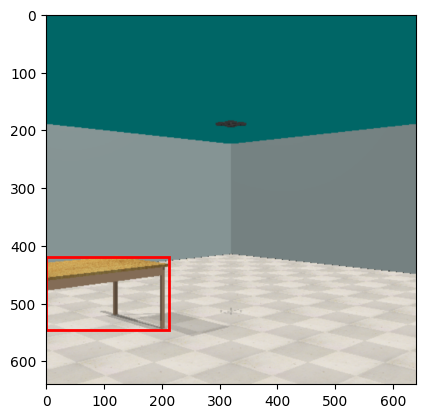

[[-0.8792304992675781, 419.037109375, 212.40701293945312, 545.7393798828125]]
[[[-0.8792304992675781, 419.037109375, 212.40701293945312, 545.7393798828125]]]
[[[[105.76389122009277, 482.38824462890625]]]]
label 0 mask result 0 iou score:0.8257531523704529
label True use color [253 231  36]
label 0 mask result 1 iou score:0.8208891153335571
label True use color [253 231  36]
label 0 mask result 2 iou score:0.9279117584228516
label True use color [253 231  36]


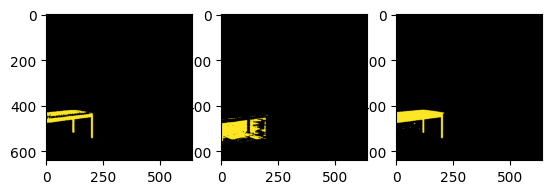

best mask:
label 1 use color [253 231  36]


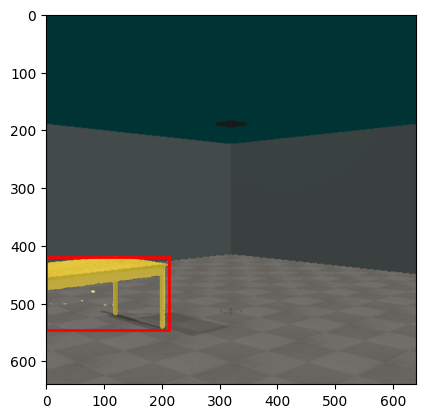

detect 1 objects in mask
label mapping dict:{0: 0, 1: 101}
inv label mapping dict:{0: 0, 101: 1}


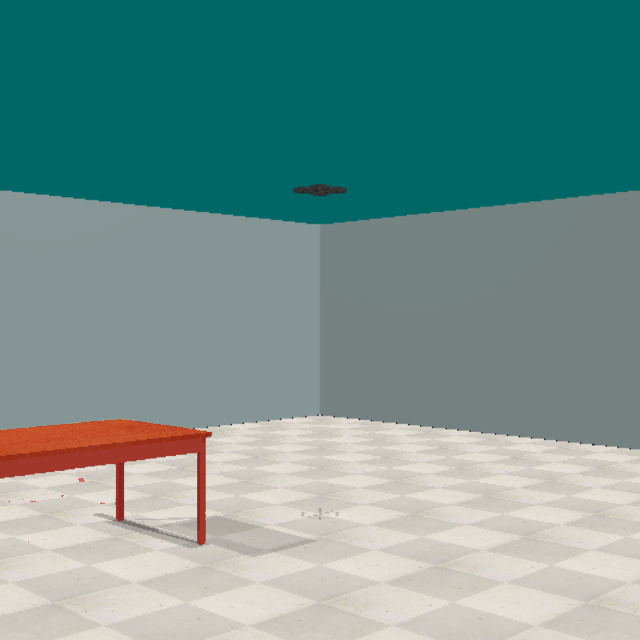

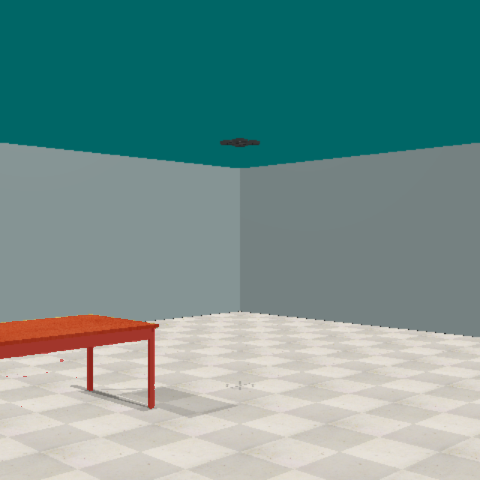

##################################################
## voxel resolution: [0.1 0.1 0.1]
##################################################


calling level: 8
*** OpenAI API call took 0.00s ***
########################################
## "planner" generated code
## context: "objects = ['table']"
########################################
objects = ['table']
# Query: go to the table.

composer('move to 10cm above the table')


calling level: 9
*** OpenAI API call took 0.00s ***
########################################
## "composer" generated code
########################################
# Query: move to 10cm above the table.

movable = parse_query_obj('quadricopter')
affordance_map = get_affordance_map('a point 10cm above the table')
execute(movable, affordance_map=affordance_map)


calling level: 10
*** OpenAI API call took 0.00s ***
########################################
## "parse_query_obj" generated code
## context: "objects = ['table']"
########################################
objects

In [ ]:


visualizer = ValueMapVisualizer(config['visualizer'])
env = VoxPoserPyRepQuadcopterEnv(visualizer=visualizer,headless=True,coppelia_scene_path=scene_path,vlmpipeline=vlmpipeline)
descriptions, obs = env.reset()
dummy_engine = Dummy()
lmps, lmp_env = setup_LMP(env, config, debug=False, engine_call_fn=dummy_engine.__call__)
voxposer_ui = lmps['plan_ui']
set_lmp_objects(lmps, env.get_object_names())

voxposer_ui(descriptions)


In [ ]:
env._pyrep.stop()
env._pyrep.shutdown()